# 1. Demonstrate using code and explain how did would you identify potential fraudulent activities in financial transactions.

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import seaborn as sb

In [2]:
df = pd.read_csv("financial_anomaly_data.csv")
df

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location
0,01-01-2023 08:00,TXN1127,ACC4,95071.92,MerchantH,Purchase,Tokyo
1,01-01-2023 08:01,TXN1639,ACC10,15607.89,MerchantH,Purchase,London
2,01-01-2023 08:02,TXN872,ACC8,65092.34,MerchantE,Withdrawal,London
3,01-01-2023 08:03,TXN1438,ACC6,87.87,MerchantE,Purchase,London
4,01-01-2023 08:04,TXN1338,ACC6,716.56,MerchantI,Purchase,Los Angeles
...,...,...,...,...,...,...,...
217436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217437,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217438,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217439,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df=df.dropna(axis=0, how="any")
df

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location
0,01-01-2023 08:00,TXN1127,ACC4,95071.92,MerchantH,Purchase,Tokyo
1,01-01-2023 08:01,TXN1639,ACC10,15607.89,MerchantH,Purchase,London
2,01-01-2023 08:02,TXN872,ACC8,65092.34,MerchantE,Withdrawal,London
3,01-01-2023 08:03,TXN1438,ACC6,87.87,MerchantE,Purchase,London
4,01-01-2023 08:04,TXN1338,ACC6,716.56,MerchantI,Purchase,Los Angeles
...,...,...,...,...,...,...,...
216955,31-05-2023 23:55,TXN1286,ACC6,62536.88,MerchantA,Withdrawal,San Francisco
216956,31-05-2023 23:56,TXN1015,ACC5,68629.69,MerchantG,Transfer,London
216957,31-05-2023 23:57,TXN1979,ACC15,8203.57,MerchantF,Purchase,London
216958,31-05-2023 23:58,TXN1845,ACC14,77800.36,MerchantF,Purchase,New York


In [4]:
df.dtypes

Timestamp           object
TransactionID       object
AccountID           object
Amount             float64
Merchant            object
TransactionType     object
Location            object
dtype: object

<Axes: xlabel='Amount'>

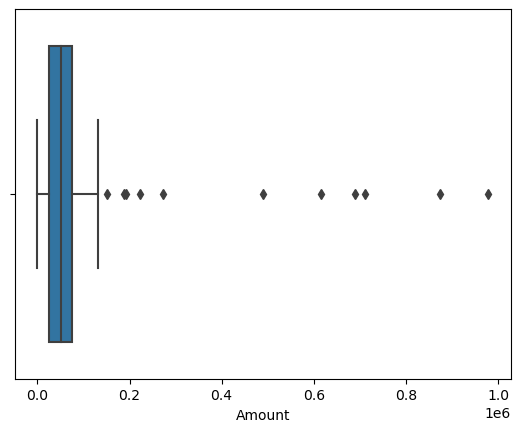

In [5]:
sb.boxplot(x=df['Amount'])

In [6]:
df['Amount'].describe()

count    216960.000000
mean      50090.025108
std       29097.905016
min          10.510000
25%       25061.242500
50%       50183.980000
75%       75080.460000
max      978942.260000
Name: Amount, dtype: float64

In [7]:
df['Location'].nunique()

5

In [8]:
df['TransactionType'].nunique()

3

In [9]:
df['Merchant'].nunique()

10

In [10]:
df['Timestamp'].nunique()

216960

In [11]:
df['AccountID'].nunique()

15

In [12]:
df['TransactionID'].nunique()

1999

In [13]:
df.columns

Index(['Timestamp', 'TransactionID', 'AccountID', 'Amount', 'Merchant',
       'TransactionType', 'Location'],
      dtype='object')

In [14]:
df=pd.get_dummies(df, columns=['AccountID', 'Merchant', 'TransactionType', 'Location'], drop_first=True)

In [15]:
df

,Timestamp,TransactionID,Amount,AccountID_ACC10,AccountID_ACC11,AccountID_ACC12,AccountID_ACC13,AccountID_ACC14,AccountID_ACC15,AccountID_ACC2,...,Merchant_MerchantG,Merchant_MerchantH,Merchant_MerchantI,Merchant_MerchantJ,TransactionType_Transfer,TransactionType_Withdrawal,Location_Los Angeles,Location_New York,Location_San Francisco,Location_Tokyo
0,01-01-2023 08:00,TXN1127,95071.92,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
1,01-01-2023 08:01,TXN1639,15607.89,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,01-01-2023 08:02,TXN872,65092.34,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,01-01-2023 08:03,TXN1438,87.87,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,01-01-2023 08:04,TXN1338,716.56,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216955,31-05-2023 23:55,TXN1286,62536.88,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
216956,31-05-2023 23:56,TXN1015,68629.69,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
216957,31-05-2023 23:57,TXN1979,8203.57,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
216958,31-05-2023 23:58,TXN1845,77800.36,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [16]:
df.columns

Index(['Timestamp', 'TransactionID', 'Amount', 'AccountID_ACC10',
       'AccountID_ACC11', 'AccountID_ACC12', 'AccountID_ACC13',
       'AccountID_ACC14', 'AccountID_ACC15', 'AccountID_ACC2',
       'AccountID_ACC3', 'AccountID_ACC4', 'AccountID_ACC5', 'AccountID_ACC6',
       'AccountID_ACC7', 'AccountID_ACC8', 'AccountID_ACC9',
       'Merchant_MerchantB', 'Merchant_MerchantC', 'Merchant_MerchantD',
       'Merchant_MerchantE', 'Merchant_MerchantF', 'Merchant_MerchantG',
       'Merchant_MerchantH', 'Merchant_MerchantI', 'Merchant_MerchantJ',
       'TransactionType_Transfer', 'TransactionType_Withdrawal',
       'Location_Los Angeles', 'Location_New York', 'Location_San Francisco',
       'Location_Tokyo'],
      dtype='object')

In [17]:
features=['Amount', 'AccountID_ACC10',
       'AccountID_ACC11', 'AccountID_ACC12', 'AccountID_ACC13',
       'AccountID_ACC14', 'AccountID_ACC15', 'AccountID_ACC2',
       'AccountID_ACC3', 'AccountID_ACC4', 'AccountID_ACC5', 'AccountID_ACC6',
       'AccountID_ACC7', 'AccountID_ACC8', 'AccountID_ACC9',
       'Merchant_MerchantB', 'Merchant_MerchantC', 'Merchant_MerchantD',
       'Merchant_MerchantE', 'Merchant_MerchantF', 'Merchant_MerchantG',
       'Merchant_MerchantH', 'Merchant_MerchantI', 'Merchant_MerchantJ',
       'TransactionType_Transfer', 'TransactionType_Withdrawal',
       'Location_Los Angeles', 'Location_New York', 'Location_San Francisco',
       'Location_Tokyo']

# Model: Isolation Forest

In [18]:
# create an isolation forest model with 100 trees and 0.01 contamination rate
model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)

In [19]:
# fit the model to the data
model.fit(df[features])

IsolationForest(contamination=0.01, random_state=42)

In [20]:
# predict the anomaly scores for each data point
scores = model.decision_function(df[features])

In [21]:
# label the data points as normal (1) or anomalous (-1)
labels = model.predict(df[features])

In [22]:
# add the scores and labels to the original dataframe
df["score"] = scores
df["label"] = labels

In [23]:
# filter the dataframe to show only the anomalous transactions
anomalies = df[df["label"] == -1]

In [24]:
anomalies

,Timestamp,TransactionID,Amount,AccountID_ACC10,AccountID_ACC11,AccountID_ACC12,AccountID_ACC13,AccountID_ACC14,AccountID_ACC15,AccountID_ACC2,...,Merchant_MerchantI,Merchant_MerchantJ,TransactionType_Transfer,TransactionType_Withdrawal,Location_Los Angeles,Location_New York,Location_San Francisco,Location_Tokyo,score,label
70,01-01-2023 09:10,TXN656,96953.99,False,False,False,True,False,False,False,...,False,True,False,True,True,False,False,False,-0.001907,-1
143,01-01-2023 10:23,TXN1891,98625.84,False,False,False,True,False,False,False,...,False,False,False,True,False,False,True,False,-0.005280,-1
210,01-01-2023 11:30,TXN1648,87645.64,False,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,-0.005911,-1
348,01-01-2023 13:48,TXN291,1476.56,False,False,True,False,False,False,False,...,False,False,False,True,False,False,True,False,-0.008430,-1
436,01-01-2023 15:16,TXN534,4326.94,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,True,-0.002368,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216703,31-05-2023 19:43,TXN386,4697.53,False,False,False,False,False,False,False,...,False,True,True,False,False,True,False,False,-0.009844,-1
216729,31-05-2023 20:09,TXN1332,667.57,False,False,False,True,False,False,False,...,True,False,True,False,True,False,False,False,-0.002820,-1
216735,31-05-2023 20:15,TXN175,7428.53,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,-0.002920,-1
216783,31-05-2023 21:03,TXN1656,37025.39,False,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,-0.000818,-1


# Model: Local Outlier Factor(LOF)

In [25]:
from sklearn.neighbors import LocalOutlierFactor

In [26]:
# create a local outlier factor model with 20 neighbors and 0.01 contamination rate
model = LocalOutlierFactor(n_neighbors=20, contamination=0.01)

# fit the model to the data and predict the labels for each data point
labels = model.fit_predict(df[features])

# add the labels to the original dataframe
df["label"] = labels

# filter the dataframe to show only the anomalous transactions
anomalies = df[df["label"] == -1]

In [27]:
anomalies

,Timestamp,TransactionID,Amount,AccountID_ACC10,AccountID_ACC11,AccountID_ACC12,AccountID_ACC13,AccountID_ACC14,AccountID_ACC15,AccountID_ACC2,...,Merchant_MerchantI,Merchant_MerchantJ,TransactionType_Transfer,TransactionType_Withdrawal,Location_Los Angeles,Location_New York,Location_San Francisco,Location_Tokyo,score,label
66,01-01-2023 09:06,TXN1689,54269.04,True,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,0.047484,-1
69,01-01-2023 09:09,TXN774,19446.06,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,0.041797,-1
79,01-01-2023 09:19,TXN1313,43390.83,False,False,False,False,True,False,False,...,False,False,False,True,False,False,True,False,0.041125,-1
260,01-01-2023 12:20,TXN781,74789.68,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,0.056178,-1
306,01-01-2023 13:06,TXN22,48095.57,True,False,False,False,False,False,False,...,True,False,False,True,True,False,False,False,0.031694,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216417,31-05-2023 14:57,TXN1617,23096.10,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,0.047051,-1
216466,31-05-2023 15:46,TXN1936,15731.36,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,True,0.085557,-1
216549,31-05-2023 17:09,TXN808,67825.05,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,0.041101,-1
216645,31-05-2023 18:45,TXN1290,89226.72,False,True,False,False,False,False,False,...,True,False,False,False,False,True,False,False,0.050306,-1


# 2. Why did you choose the given approach over other methods? Which other methods did you evaluate?

I chose both Isolation Forest(IF) and Local Outlier Factor(LOF) machine learning models to find out potential anomalies/fraudulent activities. IF is sensitive to global outliers and LOF is better suited to identify local outliers. Both types of outliers could be relevant for detecting anomalies in financial transactions.

A local outlier could be a transaction that has a high amount compared to other transactions from the same user, merchant, or location, but not compared to the overall distribution of transaction amounts. This could indicate a fraudulent transaction or a sudden change in user behaviour. Whereas, a global outlier could be a transaction that has a very low or very high amount compared to all other transactions in the dataset, regardless of the user, merchant, or location. This could also indicate an extreme event.

Morever, in the given dataset, the feature ‘Amount’ is severely skewed towards the right, and both IF and LOF can handle skewness well. However, one-class SVM cannot handle imbalanced datasets well. Also, K-means is sensitive to outliers and noise in the data, as they may affect the cluster centroids and the assignment of the points. Although DBSCAN can find both global and local outliers, it may or may do so depending on the data and the user’s definition of outliers. DBSCAN requires two parameters: epsilon and min_samples, which determine the density threshold and the minimum size of a cluster, respectively. Choosing the optimal values for these parameters can be challenging, as they depend on the scale and distribution of the data. That is why I didn’t consider one-class SVM, K-means clustering and DBSCAN models.


# 3. What features did you consider to find potential fraudulent activities? How did you perform feature engineering to improve the model?

Features considered are 'AccountID', 'Amount', 'Merchant', 'TransactionType' and 'Location'. 

Except ‘Amount’, all others are categorical variables which were transformed to dummies.

Feature scaling is not required in tree based models like IF. Even feature scaling for LOF may not be necessary in this case as just one numerical feature ‘Amount’ is present. Moreover, ‘Amount’ is heavily skewed and feature scaling may alter the relative density or shape of the data, which can affect outlier detection.


# 4. Demonstrate using code and explain how would you predict the spend for all Transaction Types for the month of June.

In [30]:
from statsmodels.tsa.arima.model import ARIMA

df1 = pd.read_csv("financial_anomaly_data.csv")
df1 = df1.dropna(axis=0, how="any")

# convert the 'Timestamp' column to datetime
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'], format="%d-%m-%Y %H:%M")

# set 'Timestamp' as the index
df1.set_index('Timestamp', inplace=True)

# group by 'TransactionType' and resample to get monthly totals for each transaction type
df1_monthly = df1.groupby('TransactionType').resample('M').sum()

# fit the ARIMA model for each transaction type
for transaction_type in df1['TransactionType'].unique():
    model = ARIMA(df1_monthly.loc[transaction_type, 'Amount'], order=(1, 1, 1))
    model_fit = model.fit()

# forecast the next month (June 2023)
forecast = model_fit.forecast(steps=1)
print(f'Forecast for {transaction_type}: {forecast}')


Forecast for Purchase: 2023-06-30    7.255925e+08
Freq: M, dtype: float64
Forecast for Withdrawal: 2023-06-30    7.283862e+08
Freq: M, dtype: float64
Forecast for Transfer: 2023-06-30    7.338594e+08
Freq: M, dtype: float64


C:\Users\pritamaxx\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\pritamaxx\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


# 5. How would you test the effectiveness of the model to unseen data?

Effectiveness of the model to unseen data can be tested by splitting the data into a training set and a test set, and using the training set to fit the IF and LOF models. The performance of the test set can be measured by metrics such as precision, recall, F1-score, or ROC curve. Cross-validation techniques, such as k-fold or leave-one-out can be used, to fit and evaluate the IF and LOF models on different subsets of the training data itself.